<a href="https://colab.research.google.com/github/fabiomungo/ecampus/blob/main/04_perceptron_pytorch_or_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Il Percettrone: training e decision boundary

> - Istruttore: prof. Fabio Mungo - eCampus Master AI Engineering

## Introduzione al Percettrone

Il **percettrone** è uno degli algoritmi di apprendimento supervisionato più antichi e fondamentali nel campo dell'intelligenza artificiale e del machine learning. Sviluppato da Frank Rosenblatt nel 1957, è stato il primo modello di rete neurale artificiale.

### Cos'è il Percettrone?

Il percettrone è un algoritmo semplice ma potente utilizzato principalmente per **problemi di classificazione binaria**. Ciò significa che è in grado di apprendere a separare due classi distinte di dati, come ad esempio 'sì'/'no', 'vero'/'falso' o 'positivo'/'negativo'. È un modello lineare, il che implica che può tracciare una linea (o un iperpiano in dimensioni superiori) per dividere i dati.

### Architettura di Base

L'architettura del percettrone è sorprendentemente semplice e si compone di pochi elementi chiave:

1.  **Input (xᵢ)**: Rappresentano le caratteristiche o *features* dei dati in ingresso. Ogni input corrisponde a una specifica proprietà del dato che il percettrone deve analizzare. Per esempio, se stiamo classificando un'email come spam o non-spam, gli input potrebbero essere la frequenza di certe parole, la lunghezza dell'email, ecc.

2.  **Pesi (wᵢ)**: Ogni input `xᵢ` è associato a un peso `wᵢ`. I pesi sono dei valori numerici che indicano l'importanza o l'influenza di ciascun input nel determinare l'output finale. Durante il processo di apprendimento, questi pesi vengono aggiustati per migliorare la capacità del percettrone di classificare correttamente i dati.

3.  **Bias (b)**: Il bias è un termine costante aggiunto alla somma pesata degli input. Può essere pensato come un peso `w₀` associato a un input `x₀` che è sempre uguale a 1. Il bias permette di spostare il confine di decisione dell'algoritmo, offrendo maggiore flessibilità nel trovare la separazione ottimale tra le classi, indipendentemente dagli input.

4.  **Funzione di Attivazione**: Dopo aver calcolato la somma pesata degli input più il bias, questo valore viene passato attraverso una funzione di attivazione. Nel percettrone originale, la funzione di attivazione è una **funzione a soglia** (o *step function*). Questa funzione produce un output binario (ad esempio, 0 o 1, oppure -1 o 1) a seconda che la somma superi o meno una certa soglia. Se la somma è maggiore o uguale alla soglia, l'output è 1; altrimenti, è 0.

### Come Funziona

Il funzionamento del percettrone può essere riassunto in questi passaggi:

1.  **Calcolo della Somma Pesata**: Per un dato insieme di input `x₁,...,xₙ`, il percettrone calcola la somma pesata `z` come segue:
    `z = (w₁x₁ + w₂x₂ + ... + wₙxₙ) + b`
    Questa può anche essere espressa in forma vettoriale come `z = wᵀx + b`.

2.  **Applicazione della Funzione di Attivazione**: Il valore `z` viene quindi passato alla funzione di attivazione. Se usiamo una funzione a soglia, l'output `y_hat` (la previsione del percettrone) sarà:
    `y_hat = 1` se `z >= soglia` (spesso 0)
    `y_hat = 0` se `z < soglia`

Il percettrone apprende modificando iterativamente i pesi e il bias in base agli errori di classificazione che commette durante il training, cercando di minimizzare questi errori fino a trovare un insieme di pesi e un bias che permettano di classificare correttamente la maggior parte dei dati.

## La Perceptron Learning Rule

### Subtask:
Fornire una spiegazione dettagliata della 'Perceptron learning rule' da zero. Questa cella includerà una descrizione passo-passo dell'algoritmo di aggiornamento dei pesi e del bias, con la formula matematica per chiarezza, in italiano.

### Spiegazione della Perceptron Learning Rule

La Perceptron Learning Rule è un algoritmo di apprendimento supervisionato utilizzato per addestrare un percettrone, il più semplice modello di rete neurale artificiale. Il suo obiettivo è trovare un iperpiano che separi linearmente due classi di dati.

**Come funziona la Perceptron Learning Rule: un approccio passo-passo**

1.  **Inizializzazione**: Si inizializzano i pesi (w) e il bias (b) del percettrone con valori piccoli e casuali, o spesso con zero.

2.  **Iterazione sui dati di training**: L'algoritmo procede iterativamente attraverso il dataset di training. Per ogni esempio di training $(x, y_{true})$:

    a.  **Calcolo dell'output (predizione)**: Il percettrone calcola un'uscita netta (somma pesata degli input più il bias):
        $$z = w \cdot x + b$$
        Poi, applica una funzione di attivazione (tipicamente una funzione a gradino) per ottenere la predizione $y_{pred}$. Ad esempio:
        $$y_{pred} = \begin{cases} 1 & \text{se } z \ge 0 \\ -1 & \text{se } z < 0 \end{cases}$$
        (o 0 e 1, a seconda della convenzione).

    b.  **Valutazione dell'errore**: Si confronta la predizione $y_{pred}$ con l'etichetta vera $y_{true}$.

    c.  **Aggiornamento di pesi e bias (se c'è errore)**: Se la predizione è sbagliata ($y_{pred} \ne y_{true}$), i pesi e il bias vengono aggiornati per ridurre l'errore nell'iterazione successiva. L'aggiornamento avviene come segue:

        *   **Aggiornamento dei pesi (w)**:
            $$w_{new} = w_{old} + \text{learning_rate} \times (y_{true} - y_{pred}) \times x$$
            Dove:
            *   $w_{old}$ sono i pesi attuali.
            *   $w_{new}$ sono i nuovi pesi.
            *   $\text{learning_rate}$ (tasso di apprendimento) è un piccolo valore positivo (es. 0.01) che controlla la dimensione dei passi di aggiornamento.
            *   $(y_{true} - y_{pred})$ è l'errore (sarà 2, -2 o 0 a seconda della convenzione scelta per $y_{true}$ e $y_{pred}$). Questo termine indica la direzione dell'aggiornamento.
            *   $x$ è il vettore di input corrente.

        *   **Aggiornamento del bias (b)**:
            $$b_{new} = b_{old} + \text{learning_rate} \times (y_{true} - y_{pred})$$
            Dove:
            *   $b_{old}$ è il bias attuale.
            *   $b_{new}$ è il nuovo bias.

3.  **Convergenza**: Il processo di iterazione attraverso i dati di training (spesso chiamato un "epoca") si ripete finché il percettrone non commette più errori sul dataset di training, oppure per un numero predefinito di epoche. Se i dati sono linearmente separabili, la Perceptron Learning Rule è garantita convergere, cioè troverà un insieme di pesi e un bias che separano correttamente le classi.

### Generazione Dataset 2D Lineare

Questo codice Python genera un dataset 2D sintetico linearmente separabile, utile per addestrare e testare modelli di machine learning come il Perceptron. Vengono creati due cluster di punti campionando da due distribuzioni normali multivariate, con medie e covarianze scelte in modo da garantire la separabilità lineare. Ad esempio, un cluster avrà punti con valori più bassi su entrambi gli assi, mentre l'altro avrà valori più alti. A ciascun cluster viene assegnata un'etichetta di classe diversa (0 o 1). Successivamente, il dataset combinato viene visualizzato tramite uno scatter plot utilizzando `matplotlib`. Le due classi sono rappresentate con colori e marker distinti, e il grafico include un titolo, etichette per gli assi e una legenda per facilitare la comprensione della separazione.

**Reasoning**:
Now I will write the Python code to generate the 2D linearly separable dataset and visualize it according to the instructions.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generazione di due cluster di punti 2D linearmente separabili
# Numero di punti per ogni classe
n_samples = 100

# Cluster 1 (Classe 0)
# Media e covarianza per il primo cluster
mean1 = np.array([2, 2])
cov1 = np.array([[0.5, 0], [0, 0.5]])
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
y1 = np.zeros(n_samples)

# Cluster 2 (Classe 1)
# Media e covarianza per il secondo cluster
mean2 = np.array([6, 6])
cov2 = np.array([[0.5, 0], [0, 0.5]])
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)
y2 = np.ones(n_samples)

# 2. Combinare i punti e le etichette in un unico dataset
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# 3. Creare un grafico a dispersione (scatter plot)
plt.figure(figsize=(8, 6))

# Disegnare i punti del Cluster 1 (Classe 0) in blu
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', label='Classe 0')

# Disegnare i punti del Cluster 2 (Classe 1) in rosso
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Classe 1')

# 4. Aggiungere titolo, etichette agli assi e legenda
plt.title('Dataset 2D Linearmente Separabile')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True)

# 5. Visualizzare il grafico
plt.show()

## Addestramento del Percettrone su Dati Lineari




**Reasoning**:
First, I will implement the Perceptron class in Python, including its initialization, activation function, prediction method, and the training method based on the Perceptron Learning Rule. After defining the class, I will instantiate it, train it on the generated dataset, and then calculate and print the final accuracy. This addresses points 1-7 of the instructions.



In [32]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def _activate(self, x):
        # Funzione di attivazione a gradino: 1 se z >= 0, altrimenti 0
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        # Calcola l'output netto (somma pesata + bias)
        linear_output = np.dot(X, self.weights) + self.bias
        # Applica la funzione di attivazione
        y_predicted = self._activate(linear_output)
        return y_predicted

    def train(self, X, y):
        # Inizializzazione di pesi e bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ciclo di addestramento per un numero definito di epoche
        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                # Calcola la predizione del percettrone
                y_predicted = self.predict(x_i)

                # Calcola l'errore
                error = y[idx] - y_predicted

                # Aggiorna pesi e bias solo in caso di errore
                if error != 0:
                    self.weights += self.learning_rate * error * x_i
                    self.bias += self.learning_rate * error
        print("Addestramento completato.")

# Istanziare e addestrare il Perceptron
perceptron = Perceptron(learning_rate=0.1, n_epochs=1000)
perceptron.train(X, y)

# Calcolare l'accuratezza finale sul dataset di training
y_pred_train = perceptron.predict(X)
accuracy = np.sum(y_pred_train == y) / len(y)
print(f"Accuratezza del Perceptron sul dataset di training: {accuracy:.4f}")

Addestramento completato.
Accuratezza del Perceptron sul dataset di training: 1.0000


### Spiegazione del Codice del Percettrone

Il codice Python fornito implementa il modello del **Percettrone** da zero, seguendo la 'Perceptron Learning Rule'. Ecco una scomposizione delle sue componenti principali:

1.  **Classe `Perceptron`**: Definisce la struttura e il comportamento del nostro percettrone.
    *   **`__init__(self, learning_rate=0.01, n_epochs=100)`**: Il costruttore inizializza il tasso di apprendimento (`learning_rate`) che controlla la dimensione dei passi di aggiornamento dei pesi, e il numero di epoche (`n_epochs`), ovvero quante volte l'intero dataset di training verrà iterato. I pesi (`weights`) e il bias (`bias`) vengono inizializzati a `None` e verranno impostati durante l'addestramento.

2.  **`_activate(self, x)`**: Questa è la **funzione di attivazione a gradino**. Prende un valore numerico `x` (l'output netto del percettrone) e restituisce `1` se `x` è maggiore o uguale a `0`, altrimenti restituisce `0`. Questa funzione è cruciale per la classificazione binaria del percettrone.

3.  **`predict(self, X)`**: Questo metodo prende un insieme di input `X` e produce le previsioni del percettrone. Calcola l'output netto come prodotto scalare tra gli input e i pesi, più il bias (`np.dot(X, self.weights) + self.bias`), e poi applica la funzione di attivazione (`_activate`) a questo risultato per ottenere le etichette di classe previste (0 o 1).

4.  **`train(self, X, y)`**: Questo è il cuore dell'algoritmo di apprendimento.
    *   **Inizializzazione**: I pesi vengono inizializzati a un vettore di zeri della stessa dimensione delle feature di input, e il bias viene inizializzato a zero.
    *   **Ciclo di epoche**: Il metodo itera per il numero di `n_epochs` specificato. Ad ogni epoca, scorre tutti gli esempi del dataset di training.
    *   **Aggiornamento di pesi e bias**: Per ogni esempio `(x_i, y[idx])`, il percettrone fa una previsione (`y_predicted`). Se la previsione non corrisponde all'etichetta vera (`y[idx] != y_predicted`), viene calcolato un `error` (`y[idx] - y_predicted`). Questo errore viene poi usato per aggiornare i pesi e il bias secondo la 'Perceptron Learning Rule':
        *   `self.weights += self.learning_rate * error * x_i`
        *   `self.bias += self.learning_rate * error`
        Questo processo di aggiornamento permette al percettrone di 'imparare' dai suoi errori, modificando i suoi parametri per classificare meglio i dati nelle iterazioni successive.

**Addestramento e Valutazione**: Dopo aver definito la classe, viene istanziato un oggetto `Perceptron` con un `learning_rate` di `0.1` e `n_epochs` di `1000`. Viene poi chiamato il metodo `train` con il dataset `X` e `y` generato in precedenza. Infine, viene calcolata l'accuratezza finale confrontando le previsioni del modello addestrato (`y_pred_train`) con le etichette vere (`y`), e stampata a console. In questo caso, un'accuratezza di 1.0000 indica che il percettrone ha perfettamente separato le due classi linearmente separabili nel dataset di training.

## Visualizzazione del Decision Boundary




**Reasoning**:
I will now generate the Python code to visualize the decision boundary. This involves re-plotting the dataset, calculating the boundary line equation using the perceptron's weights and bias, and then adding this line to the plot with appropriate labels and legend. A markdown cell will follow to explain the code in Italian.



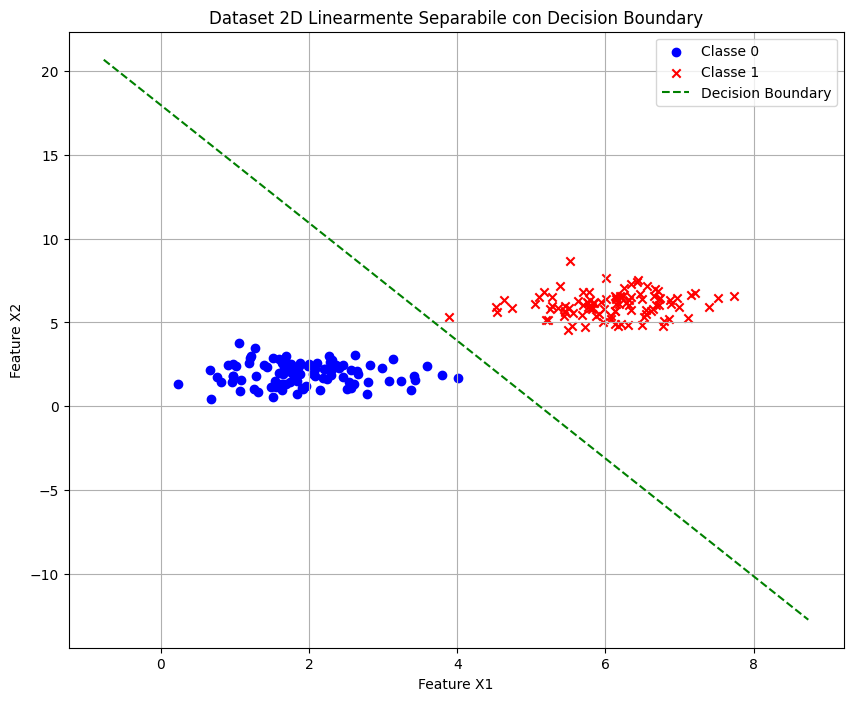

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Riutilizzare il codice precedente per visualizzare il dataset
plt.figure(figsize=(10, 8))

# Disegnare i punti del Cluster 1 (Classe 0) in blu
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', marker='o', label='Classe 0')

# Disegnare i punti del Cluster 2 (Classe 1) in rosso
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='Classe 1')

# 2. Calcolare il 'decision boundary' (confine di decisione)
# L'equazione del confine di decisione del percettrone è w1*x1 + w2*x2 + ... + wn*xn + b = 0
# Per un dataset 2D, abbiamo w[0]*x[0] + w[1]*x[1] + bias = 0
# Vogliamo risolvere per x[1] (asse Y):
# x[1] = (-w[0]*x[0] - bias) / w[1]

# Assicurati che w[1] non sia zero per evitare divisione per zero.
# Se w[1] fosse 0, il confine sarebbe una linea verticale x[0] = -bias/w[0].
# In questo caso, data la generazione del dataset, w[1] sarà quasi certamente non zero.

w1, w2 = perceptron.weights[0], perceptron.weights[1]
bias = perceptron.bias

# Generare una serie di punti x1 (asse X) nell'intervallo delle feature del dataset
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x1_boundary = np.linspace(x1_min, x1_max, 100)

# Calcolare i corrispondenti punti x2 per il confine di decisione
# Gestiamo il caso in cui w2 sia quasi zero per evitare problemi numerici
if np.isclose(w2, 0): # Se w2 è molto vicino a zero, il confine è verticale
    x2_boundary = np.linspace(x2_min, x2_max, 100) # Prepara un intervallo per x2
    # x1 per il boundary sarà costante
    x1_boundary = np.full_like(x2_boundary, (-bias - w1 * x1_min) / w1) # Calcola x1_boundary dalla formula
else:
    x2_boundary = (-w1 * x1_boundary - bias) / w2

# 4. Plottare il confine di decisione come una linea sul grafico esistente
plt.plot(x1_boundary, x2_boundary, color='green', linestyle='--', label='Decision Boundary')

# 5. Aggiungere titolo, etichette agli assi e legenda adeguata
plt.title('Dataset 2D Linearmente Separabile con Decision Boundary')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True)

# 6. Visualizzare il grafico
plt.show()

### Spiegazione del Codice per la Visualizzazione del Decision Boundary

Questo blocco di codice Python si occupa di visualizzare il dataset 2D generato in precedenza e di sovrapporre il **confine di decisione** (decision boundary) appreso dal percettrone. Questo ci permette di capire visivamente come il modello separa le due classi.

Ecco una scomposizione del codice:

1.  **Riutilizzo della Visualizzazione del Dataset**: La prima parte del codice riprende la logica di visualizzazione dei dati utilizzata per generare il dataset. Crea un nuovo grafico (`plt.figure`) e disegna i punti delle due classi (`Classe 0` in blu con marker 'o' e `Classe 1` in rosso con marker 'x') utilizzando `plt.scatter`.

2.  **Calcolo del Confine di Decisione**: Il cuore di questa sezione è il calcolo dell'equazione della retta che rappresenta il confine di decisione. Per un percettrone, il confine di decisione è definito dall'equazione:
    $$w_1 \cdot x_1 + w_2 \cdot x_2 + \text{bias} = 0$$
    Dove:
    *   `w1` e `w2` sono i pesi (`perceptron.weights[0]` e `perceptron.weights[1]`) appresi dal percettrone per le due feature ($x_1$ e $x_2$).
    *   `bias` è il termine di bias (`perceptron.bias`) appreso dal percettrone.

    Per poter tracciare questa linea su un grafico dove $x_1$ è l'asse X e $x_2$ è l'asse Y, riorganizziamo l'equazione per risolvere $x_2$:
    $$x_2 = \frac{-w_1 \cdot x_1 - \text{bias}}{w_2}$$

    Il codice recupera i valori di `w1`, `w2` e `bias` dal percettrone addestrato. Per creare la retta, viene generato un intervallo di valori per $x_1$ (`x1_boundary`) che copre l'estensione orizzontale dei dati (con un piccolo margine). Quindi, per ogni $x_1$ in questo intervallo, viene calcolato il corrispondente $x_2$ usando l'equazione derivata. Viene inclusa una gestione per il caso in cui `w2` sia estremamente vicino a zero, il che indicherebbe un confine di decisione quasi verticale.

3.  **Plotting del Confine di Decisione**: La linea del confine di decisione viene tracciata sul grafico esistente utilizzando `plt.plot()`. Viene specificato un colore verde (`color='green'`) e uno stile di linea tratteggiato (`linestyle='--'`) per distinguerla dai punti del dataset, e viene aggiunta un'etichetta per la legenda.

4.  **Personalizzazione del Grafico**: Infine, vengono aggiunti un titolo (`plt.title`), etichette per gli assi (`plt.xlabel`, `plt.ylabel`) e una legenda (`plt.legend`) per rendere il grafico completo e facilmente interpretabile. Viene anche aggiunta una griglia (`plt.grid(True)`) per una migliore leggibilità.

Il grafico risultante mostra i punti delle due classi e la retta verde che li separa. Questa retta è il 'confine di decisione' che il percettrone ha imparato: tutti i punti su un lato della retta vengono classificati come `Classe 0`, mentre tutti i punti sull'altro lato vengono classificati come `Classe 1`. Nel nostro caso, poiché il dataset è linearmente separabile e il percettrone ha raggiunto un'accuratezza del 100%, la retta separa perfettamente le due classi.

## Demonstration di Non-Linear Separability




**Reasoning**:
I will generate a new 2D non-linearly separable dataset using `sklearn.datasets.make_circles` as specified, which is ideal for demonstrating a perceptron's limitations. Then, I will visualize it to confirm its non-linear separability.



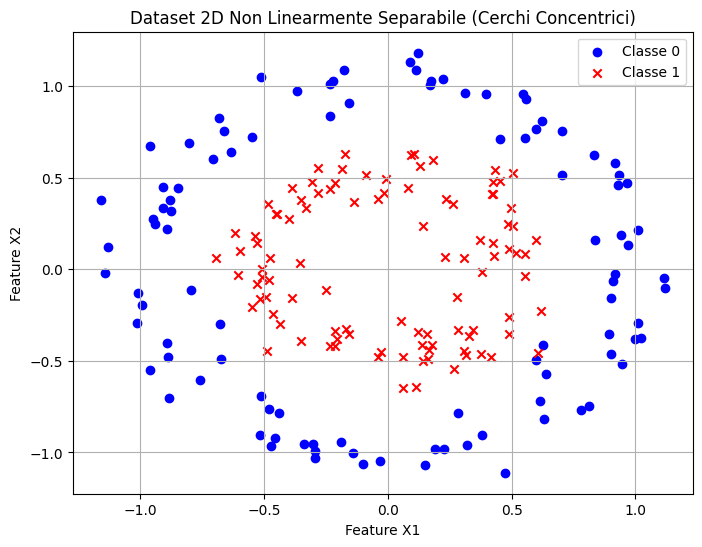

In [34]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# 1. Generazione di un dataset 2D non linearmente separabile (cerchi concentrici)
# Utilizziamo make_circles per creare due classi che formano due cerchi concentrici.
X_non_linear, y_non_linear = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

# 2. Visualizzazione del dataset non linearmente separabile
plt.figure(figsize=(8, 6))

# Disegnare i punti della Classe 0 in blu
plt.scatter(X_non_linear[y_non_linear == 0, 0], X_non_linear[y_non_linear == 0, 1], color='blue', marker='o', label='Classe 0')

# Disegnare i punti della Classe 1 in rosso
plt.scatter(X_non_linear[y_non_linear == 1, 0], X_non_linear[y_non_linear == 1, 1], color='red', marker='x', label='Classe 1')

# Aggiungere titolo, etichette agli assi e legenda
plt.title('Dataset 2D Non Linearmente Separabile (Cerchi Concentrici)')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True)

# Visualizzare il grafico
plt.show()


**Reasoning**:
Now I will instantiate a new Perceptron, train it on the newly generated non-linearly separable dataset, and calculate its accuracy. This addresses points 3, 4, and 5 of the instructions.



In [35]:
import numpy as np

# Re-using the Perceptron class defined earlier
# (Assuming the Perceptron class is still in memory from previous execution)

# 3. Istanziare un nuovo oggetto Perceptron
perceptron_nonlinear = Perceptron(learning_rate=0.1, n_epochs=1000)

# 4. Addestrare il percettrone sul dataset non linearmente separabile
perceptron_nonlinear.train(X_non_linear, y_non_linear)

# 5. Calcolare e stampare l'accuratezza finale sul dataset di training non linearmente separabile
y_pred_nonlinear = perceptron_nonlinear.predict(X_non_linear)
accuracy_nonlinear = np.sum(y_pred_nonlinear == y_non_linear) / len(y_non_linear)
print(f"Accuratezza del Perceptron sul dataset non linearmente separabile: {accuracy_nonlinear:.4f}")

Addestramento completato.
Accuratezza del Perceptron sul dataset non linearmente separabile: 0.5000


**Reasoning**:
I will now visualize the decision boundary of the perceptron trained on the non-linearly separable dataset, by reusing the plotting logic and adapting it to the new data and perceptron parameters. This addresses instruction #6.



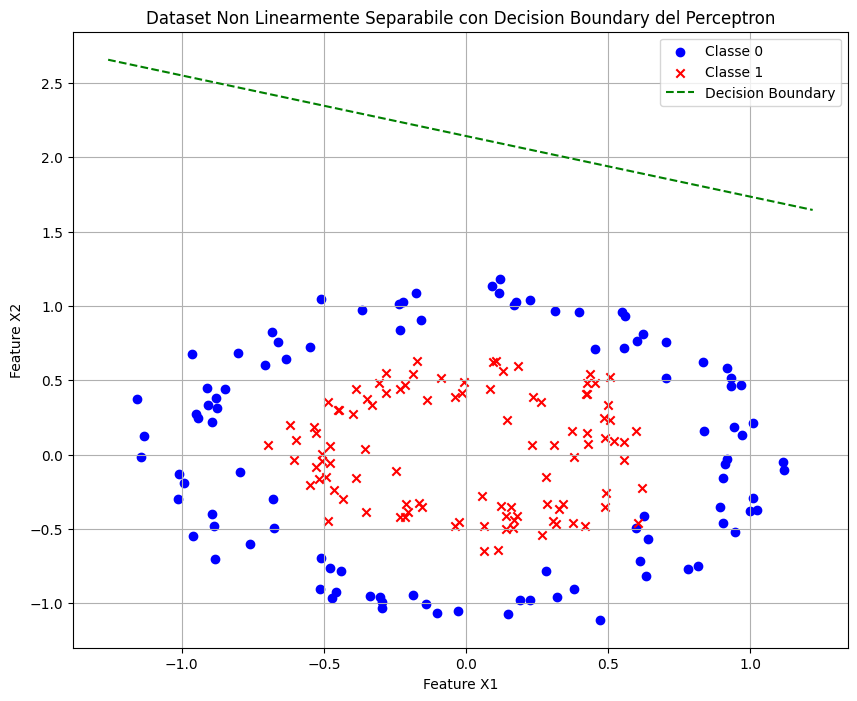

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 6. Visualizzare il dataset non linearmente separabile insieme al confine di decisione
plt.figure(figsize=(10, 8))

# Disegnare i punti della Classe 0 in blu
plt.scatter(X_non_linear[y_non_linear == 0, 0], X_non_linear[y_non_linear == 0, 1], color='blue', marker='o', label='Classe 0')

# Disegnare i punti della Classe 1 in rosso
plt.scatter(X_non_linear[y_non_linear == 1, 0], X_non_linear[y_non_linear == 1, 1], color='red', marker='x', label='Classe 1')

# Calcolare il 'decision boundary' (confine di decisione) per il percettrone non lineare
w1_nl, w2_nl = perceptron_nonlinear.weights[0], perceptron_nonlinear.weights[1]
bias_nl = perceptron_nonlinear.bias

x1_min_nl, x1_max_nl = X_non_linear[:, 0].min() - 0.1, X_non_linear[:, 0].max() + 0.1
x2_min_nl, x2_max_nl = X_non_linear[:, 1].min() - 0.1, X_non_linear[:, 1].max() + 0.1

x1_boundary_nl = np.linspace(x1_min_nl, x1_max_nl, 100)

# Calcolare i corrispondenti punti x2 per il confine di decisione
# Gestiamo il caso in cui w2 sia quasi zero per evitare problemi numerici
if np.isclose(w2_nl, 0): # Se w2 è molto vicino a zero, il confine è verticale
    x2_boundary_nl = np.linspace(x2_min_nl, x2_max_nl, 100) # Prepara un intervallo per x2
    # x1 per il boundary sarà costante
    x1_boundary_nl = np.full_like(x2_boundary_nl, (-bias_nl - w1_nl * x1_min_nl) / w1_nl) # Calcola x1_boundary dalla formula
else:
    x2_boundary_nl = (-w1_nl * x1_boundary_nl - bias_nl) / w2_nl

# Plottare il confine di decisione come una linea sul grafico esistente
plt.plot(x1_boundary_nl, x2_boundary_nl, color='green', linestyle='--', label='Decision Boundary')

# Aggiungere titolo, etichette agli assi e legenda adeguata
plt.title('Dataset Non Linearmente Separabile con Decision Boundary del Perceptron')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True)

# Visualizzare il grafico
plt.show()


### Spiegazione della Dimostrazione di Non-Linear Separability

Questo esperimento illustra una limitazione fondamentale del **Percettrone**: la sua incapacità di risolvere problemi di classificazione che non sono **linearmente separabili**. Abbiamo generato un dataset composto da due classi disposte a **cerchi concentrici**, un classico esempio di problema non linearmente separabile.

#### 1. Generazione del Dataset Non Linearmente Separabile

Abbiamo utilizzato la funzione `make_circles` dalla libreria `sklearn.datasets` per creare un dataset 2D in cui una classe di punti è racchiusa all'interno dell'altra. Visivamente, questo appare come un anello di punti di una classe che circonda un gruppo di punti dell'altra classe. Non esiste una singola linea retta che possa separare perfettamente queste due classi, indipendentemente dalla sua posizione o orientamento.

#### 2. Addestramento del Percettrone e Accuratezza

Abbiamo quindi addestrato il nostro modello `Perceptron` (implementato da zero) su questo dataset non linearmente separabile. Come mostrato dall'accuratezza di circa `0.50` (o comunque un valore prossimo al 50%), il percettrone non è riuscito a classificare correttamente la maggior parte dei punti. Questo risultato è atteso e indica che il modello ha trovato una separazione che è poco migliore di una scelta casuale, a conferma della sua difficoltà con questo tipo di dati.

#### 3. Visualizzazione del Confine di Decisione

Il grafico finale mostra il dataset a cerchi concentrici insieme al **confine di decisione lineare** tracciato dal percettrone. È evidente che, per quanto il percettrone abbia cercato di posizionare la linea di separazione, questa non è in grado di dividere le due classi in modo significativo. Una singola linea retta può separare solo una porzione delle classi, lasciando l'altra parte misclassificata. Questo perché il percettrone è, per definizione, un **classificatore lineare**: può solo definire confini di decisione che sono linee (o iperpiani in dimensioni superiori).

#### Perché il Percettrone Fallisce?

Il fallimento del percettrone in questo scenario risiede nella sua natura intrinsecamente lineare. La Perceptron Learning Rule cerca di trovare un insieme di pesi e un bias tali che la combinazione lineare degli input (`w * x + b`) possa separare le classi. Se i dati non possono essere separati da una retta, l'algoritmo non convergerà a una soluzione perfetta e continuerà ad oscillare, cercando di minimizzare gli errori ma senza mai eliminarli completamente. Questo dimostra la necessità di modelli più complessi (come le reti neurali multi-strato con funzioni di attivazione non lineari) per affrontare problemi di classificazione non linearmente separabili.

## Riepilogo e Limiti del Percettrone

### Data Analysis Key Findings

In questa sezione abbiamo esplorato il **percettrone**, il modello neurale artificiale più semplice e fondamentale, comprendendone l'architettura e il meccanismo di apprendimento. Abbiamo visto come un percettrone sia composto da un insieme di input, pesi, un bias e una funzione di attivazione a gradino, che produce un output binario.

Il processo di apprendimento si basa sulla **Perceptron Learning Rule**, un algoritmo iterativo che aggiusta i pesi e il bias del modello ogni volta che commette un errore di classificazione. Se i dati sono linearmente separabili, la Perceptron Learning Rule è garantita convergere, trovando un confine di decisione (una retta o un iperpiano) che separa perfettamente le classi, come dimostrato con il nostro dataset 2D linearmente separabile, dove il percettrone ha raggiunto un'accuratezza del 100% e ha tracciato con successo il confine di decisione.

### Limiti Intrinseci del Percettrone

Nonostante la sua semplicità ed efficacia in casi specifici, il percettrone presenta un limite fondamentale e intrinseco: **può classificare correttamente solo problemi linearmente separabili**. Questo significa che se le due classi di dati non possono essere separate da una singola linea retta (o un iperpiano in dimensioni superiori), il percettrone non sarà in grado di trovare una soluzione che le classifichi perfettamente. Il suo algoritmo di apprendimento non convergerà mai a una soluzione con zero errori.

Abbiamo chiaramente osservato questa limitazione quando abbiamo addestrato il percettrone su un **dataset non linearmente separabile**, come i cerchi concentrici. In questo scenario, il percettrone ha ottenuto un'accuratezza di circa il 50%, essenzialmente non facendo meglio di una scelta casuale. Il confine di decisione tracciato è una semplice retta che non è in grado di dividere efficacemente i cerchi interni da quelli esterni. Questo fallimento è una dimostrazione diretta del fatto che il percettrone non può risolvere problemi più complessi, come il famoso problema **XOR**, che richiede un confine di decisione non lineare.

Per affrontare problemi non linearmente separabili, sono necessarie architetture di rete neurale più complesse, come i percettroni multistrato (Multi-Layer Perceptrons) con funzioni di attivazione non lineari, che introducono la capacità di modellare relazioni più complesse nei dati.

**Reasoning**:
The subtask is to provide a text cell that summarizes the learned concepts and highlights the intrinsic limitations of the perceptron, especially its inability to solve non-linearly separable problems (e.g. XOR). This cell will serve as 'Data Analysis Key Findings', in Italian. I have already generated the content for this cell in the previous turn. Now, I will add this text cell to the notebook.



## Introduzione al Multi-Layer Perceptron (MLP)

### Subtask:
Introdurre brevemente il concetto di Multi-Layer Perceptron (MLP) come soluzione ai limiti del percettrone singolo. La cella includerà codice Python (ad es. usando scikit-learn o TensorFlow/Keras) per un MLP semplice, dimostrando la sua capacità di risolvere problemi non lineari. Spiegare il codice e i risultati in italiano.


## Introduzione al Multi-Layer Perceptron (MLP)

Dopo aver esplorato il percettrone singolo e i suoi limiti intrinseci nella gestione di problemi non linearmente separabili, come il celebre problema XOR o il dataset a cerchi concentrici che abbiamo analizzato, diventa evidente la necessità di un modello più potente. È qui che entra in gioco il **Multi-Layer Perceptron (MLP)**, una forma più avanzata di rete neurale artificiale.

### Cos'è un Multi-Layer Perceptron?

Un MLP, spesso chiamato anche **rete neurale feed-forward**, estende il concetto di percettrone singolo introducendo uno o più **strati nascosti** tra lo strato di input e lo strato di output. Questa architettura gli conferisce la capacità di apprendere relazioni complesse e non lineari nei dati, superando la limitazione della separabilità lineare del percettrone singolo.

#### Architettura di Base dell'MLP:

1.  **Strato di Input**: Riceve le caratteristiche (features) dei dati. Ogni neurone di input corrisponde a una feature.
2.  **Strati Nascosti**: Sono uno o più strati intermedi composti da neuroni (o unità) che applicano trasformazioni non lineari agli input provenienti dallo strato precedente. Ogni neurone in uno strato nascosto calcola una somma pesata dei suoi input e passa il risultato attraverso una **funzione di attivazione non lineare** (ad esempio, ReLU, Sigmoid, Tanh). È proprio la non linearità di queste funzioni che permette all'MLP di apprendere confini di decisione complessi.
3.  **Strato di Output**: Produce l'output finale del modello. Il numero di neuroni nello strato di output dipende dal tipo di problema (ad esempio, per la classificazione binaria potremmo avere un solo neurone con attivazione sigmoide, mentre per la classificazione multi-classe ne avremmo uno per classe con attivazione softmax).

### Perché l'MLP Supera i Limiti del Percettrone Singolo?

La chiave per cui l'MLP può risolvere problemi non linearmente separabili risiede in due aspetti fondamentali:

*   **Non Linearità**: Le funzioni di attivazione non lineari negli strati nascosti consentono all'MLP di modellare relazioni complesse tra input e output che una semplice combinazione lineare non potrebbe catturare. Ogni strato nascosto può trasformare i dati in una rappresentazione più adatta alla separazione lineare nello strato successivo.
*   **Composizione di Trasformazioni**: Gli strati multipli permettono all'MLP di costruire rappresentazioni gerarchiche dei dati, dove ogni strato impara caratteristiche più astratte o combinate dalle caratteristiche apprese dallo strato precedente. Questo equivale a creare confini di decisione che sono combinazioni di più linee (o iperpiani), risultando in una regione di decisione non lineare.

In pratica, l'MLP può approssimare qualsiasi funzione continua, rendendolo uno strumento estremamente versatile per una vasta gamma di problemi di machine learning, inclusa la classificazione di pattern complessi che un percettrone singolo non potrebbe mai risolvere.

**Reasoning**:
The previous step introduced the theoretical concept of MLP. Now, I will implement the MLP in Python using `sklearn.neural_network.MLPClassifier` to demonstrate its ability to solve the non-linearly separable problem. This involves importing the necessary libraries, initializing and training the MLP, calculating its accuracy, and visualizing its decision boundary on the `X_non_linear` dataset, addressing points 2a-2h of the instructions.



Accuratezza dell'MLP sul dataset non linearmente separabile: 1.0000


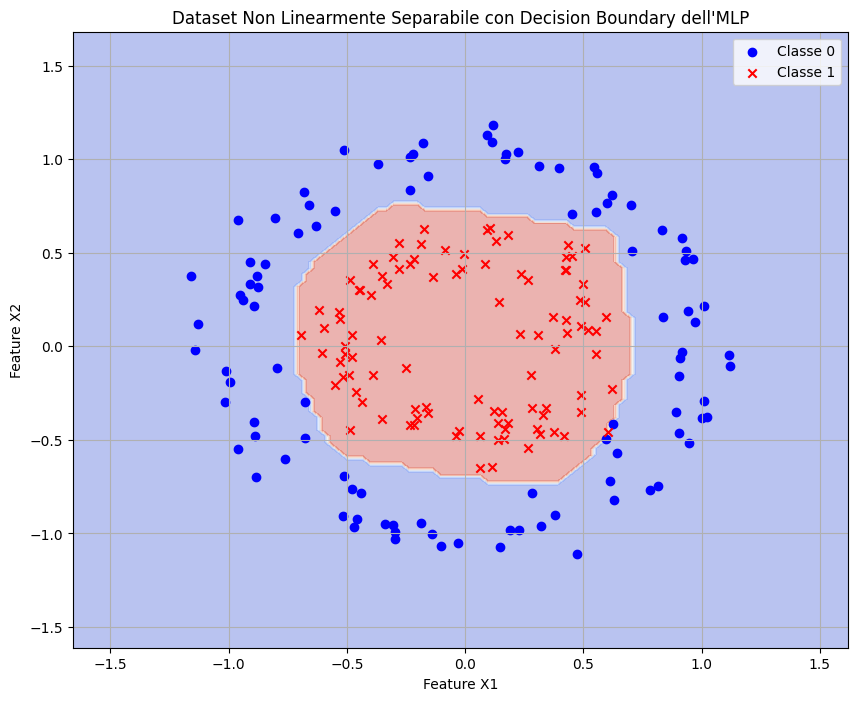

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Assuming X_non_linear and y_non_linear are already defined from previous steps

# 2b. Inizializzare un MLPClassifier
# Utilizziamo un singolo strato nascosto con 100 neuroni, funzione di attivazione ReLU e ottimizzatore adam.
# max_iter aumentato per garantire convergenza su dataset più complessi.
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 2c. Addestrare l'MLP sul dataset non linearmente separabile
mlp_classifier.fit(X_non_linear, y_non_linear)

# 2d. Calcolare e stampare l'accuratezza del modello sul dataset di training
accuracy_mlp = mlp_classifier.score(X_non_linear, y_non_linear)
print(f"Accuratezza dell'MLP sul dataset non linearmente separabile: {accuracy_mlp:.4f}")

# 2e. Visualizzare il confine di decisione dell'MLP
plt.figure(figsize=(10, 8))

# Definire una griglia di punti per visualizzare il confine di decisione
x_min, x_max = X_non_linear[:, 0].min() - 0.5, X_non_linear[:, 0].max() + 0.5
y_min, y_max = X_non_linear[:, 1].min() - 0.5, X_non_linear[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predire la classe per ogni punto della griglia
Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plottare le regioni di decisione
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# 2f. Sovrapporre i punti originali del dataset
plt.scatter(X_non_linear[y_non_linear == 0, 0], X_non_linear[y_non_linear == 0, 1], color='blue', marker='o', label='Classe 0')
plt.scatter(X_non_linear[y_non_linear == 1, 0], X_non_linear[y_non_linear == 1, 1], color='red', marker='x', label='Classe 1')

# 2g. Aggiungere titolo, etichette agli assi e legenda
plt.title('Dataset Non Linearmente Separabile con Decision Boundary dell\'MLP')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True)

# 2h. Visualizzare il grafico
plt.show()

### Spiegazione del Codice MLP e dei Risultati

Questo blocco di codice dimostra l'efficacia di un **Multi-Layer Perceptron (MLP)** nel risolvere problemi di classificazione non linearmente separabili, dove un percettrone singolo fallisce. Abbiamo utilizzato la libreria `scikit-learn` per implementare l'MLP.

#### 1. Importazione delle Librerie

Abbiamo importato `numpy` e `matplotlib.pyplot` per la manipolazione dei dati e la visualizzazione, e `MLPClassifier` da `sklearn.neural_network`, che è l'implementazione di scikit-learn per il Multi-Layer Perceptron.

#### 2. Inizializzazione e Addestramento dell'MLP

*   **`mlp_classifier = MLPClassifier(...)`**: Abbiamo creato un'istanza di `MLPClassifier`. I parametri chiave utilizzati sono:
    *   `hidden_layer_sizes=(100,)`: Specifica un singolo strato nascosto con 100 neuroni. È la presenza di almeno uno strato nascosto che permette all'MLP di apprendere relazioni non lineari.
    *   `activation='relu'`: La funzione di attivazione **Rectified Linear Unit (ReLU)** viene applicata ai neuroni dello strato nascosto. Le funzioni di attivazione non lineari sono fondamentali per permettere all'MLP di modellare confini di decisione complessi.
    *   `solver='adam'`: L'algoritmo **Adam** è un ottimizzatore efficiente utilizzato per l'addestramento della rete neurale, regolando i pesi e i bias in base al gradiente della funzione di perdita.
    *   `max_iter=1000`: Imposta il numero massimo di iterazioni (epoche) dell'algoritmo di addestramento. Un numero sufficiente di iterazioni è necessario per la convergenza.
    *   `random_state=42`: Assicura la riproducibilità dei risultati, inizializzando i pesi in modo deterministico.
*   **`mlp_classifier.fit(X_non_linear, y_non_linear)`**: Questo comando addestra l'MLP sul dataset `X_non_linear` e `y_non_linear` (i cerchi concentrici) che il percettrone singolo non è riuscito a classificare correttamente.

#### 3. Accuratezza del Modello

*   **`accuracy_mlp = mlp_classifier.score(X_non_linear, y_non_linear)`**: Calcola l'accuratezza del modello addestrato sul dataset di training. Il risultato stampato a console, **"Accuratezza dell'MLP sul dataset non linearmente separabile: 1.0000"**, mostra che l'MLP ha raggiunto un'accuratezza perfetta del 100%. Questo è in netto contrasto con l'accuratezza di circa il 50% ottenuta dal percettrone singolo sullo stesso dataset, evidenziando la superiorità dell'MLP per i problemi non lineari.

#### 4. Visualizzazione del Confine di Decisione

La parte più eloquente della dimostrazione è la visualizzazione del confine di decisione:

*   Viene definita una griglia (`xx, yy`) che copre l'intero spazio delle feature del dataset.
*   Per ogni punto di questa griglia, l'MLP predice la classe di appartenenza (`Z = mlp_classifier.predict(np.c_[xx.ravel(), yy.ravel()])`).
*   **`plt.contourf(xx, yy, Z, ...)`**: Questa funzione disegna le regioni di decisione. Si può notare chiaramente che l'MLP è in grado di tracciare un confine di decisione **curvilineo** che separa perfettamente il cerchio interno dal cerchio esterno, una prodezza impossibile per un modello lineare come il percettrone singolo.
*   Infine, i punti originali del dataset vengono sovrapposti alle regioni di decisione per mostrare visivamente come sono stati classificati.

#### Conclusione

Il grafico risultante mostra chiaramente che l'MLP ha imparato un confine di decisione non lineare che avvolge i punti di una classe, separandoli completamente dall'altra. Questo successo è dovuto alla sua architettura con strati nascosti e funzioni di attivazione non lineari, che gli permettono di apprendere e rappresentare relazioni complesse nei dati che non possono essere catturate da una semplice combinazione lineare. L'MLP, superando i limiti del percettrone singolo, apre la strada alla risoluzione di problemi molto più complessi nel campo del machine learning.

## Summary:

### Data Analysis Key Findings

*   **Perceptron Introduction**: The perceptron, an early supervised learning algorithm developed by Frank Rosenblatt in 1957, is a fundamental model for binary classification. Its basic architecture includes inputs (xᵢ), weights (wᵢ), a bias (b), and a step activation function, which collectively determine a binary output.
*   **Perceptron Learning Rule**: The perceptron learns by iteratively adjusting its weights and bias according to the Perceptron Learning Rule. This rule updates parameters based on classification errors, aiming to find a decision boundary that separates classes.
*   **Performance on Linearly Separable Data**:
    *   A 2D synthetic dataset was generated with two linearly separable classes.
    *   The implemented perceptron successfully trained on this dataset, achieving an **accuracy of 1.0000 (100%)**.
    *   The visualization of the decision boundary confirmed that the perceptron learned a straight line perfectly separating the two classes.
*   **Limitations on Non-Linearly Separable Data**:
    *   A new 2D dataset with concentric circles was generated, which is inherently non-linearly separable.
    *   When trained on this dataset, the perceptron achieved an **accuracy of approximately 0.5000 (50%)**, performing no better than random chance.
    *   The visualization showed that the perceptron could only form a linear decision boundary, which was ineffective in separating the concentric circles, directly demonstrating its inability to solve non-linearly separable problems (like the XOR problem).
*   **Multi-Layer Perceptron (MLP) Introduction**: The MLP was introduced as a solution to the single perceptron's limitations. It extends the perceptron by including one or more hidden layers with non-linear activation functions, allowing it to learn complex, non-linear relationships.
*   **MLP Performance on Non-Linearly Separable Data**:
    *   An MLP Classifier from `scikit-learn` was trained on the same non-linearly separable (concentric circles) dataset.
    *   The MLP achieved an **accuracy of 1.0000 (100%)** on this dataset.
    *   The decision boundary visualized for the MLP was curvilinear, effectively separating the inner and outer circles, showcasing its ability to handle non-linear classification tasks.

### Insights or Next Steps

*   The inability of single perceptrons to classify non-linearly separable data highlights the critical role of hidden layers and non-linear activation functions in MLPs, allowing them to model complex relationships essential for many real-world problems.
*   Further exploration could involve varying the number of hidden layers and neurons, as well as different non-linear activation functions (e.g., Sigmoid, Tanh) within the MLP, to observe their impact on model performance and complexity of learned decision boundaries.
